# Confidence Interval for a Population Mean 

In [0]:
import numpy as np

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data generation


In [0]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

In [0]:
X = [i[0] for i in blobs[0]]
Y = [i[1] for i in blobs[0]]

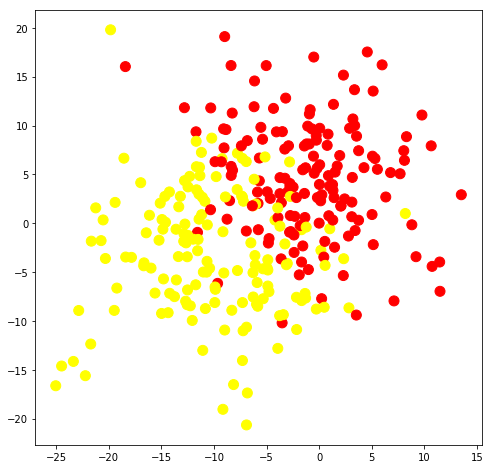

In [0]:
pylab.figure(figsize(8, 8))

pylab.scatter(X, Y, c = blobs[1], cmap = 'autumn', s=100)

##  Comparison of linear models

### Point estimation

In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(
    blobs[0], blobs[1],
    test_size = 15,
    random_state = 1
)

In [0]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)

metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.8888888888888888

In [0]:
sgd_model = linear_model.SGDClassifier(random_state = 0)
sgd_model.fit(train_data, train_labels)

metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.7777777777777778

### Mean estimation

In [0]:
sgd_auc_scores = cross_val_score(
    linear_model.SGDClassifier(),
    blobs[0],
    blobs[1],
    scoring = 'roc_auc',
    cv = 20
)

In [0]:
ridge_auc_scores = cross_val_score(
    linear_model.RidgeClassifier(),
    blobs[0],
    blobs[1],
    scoring = 'roc_auc',
    cv = 20
)

### Mean

In [0]:
print (f"sgd model auc: mean {sgd_auc_scores.mean()}, std {sgd_auc_scores.std(ddof=1)}")
print (f"ridge model auc: mean {ridge_auc_scores.mean()}, std {ridge_auc_scores.std(ddof=1)}")

sgd model auc: mean 0.9201690051020407, std 0.06861054658054572
ridge model auc: mean 0.9479910714285713, std 0.05365806084995355


### Confidence Interval for population mean

In [0]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [0]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### Z-Interval

Let's assume: $\sigma^2=0.25$.

In [0]:
sgd_ci =  _zconfint_generic(
    sgd_mean,
    sqrt(0.25/len(sgd_auc_scores)),
    0.05,
    'two-sided',
)

r_ci = _zconfint_generic(
    ridge_mean,
    sqrt(0.25/len(sgd_auc_scores)),
    0.05,
    'two-sided',
)


print ("sgd model mean auc 95%% confidence interval", sgd_ci)
print ("ridge model mean auc 95%% confidence interval", r_ci)

sgd model mean auc 95%% confidence interval (0.7010383699578953, 1.1392996402461861)
ridge model mean auc 95%% confidence interval (0.728860436284426, 1.1671217065727166)


#### T-interval


Instead of theoretical variance $\sigma^2$, which we do not know, let's use sample variance and calculate confidence intervals: $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [0]:
type(sgd_auc_scores)

numpy.ndarray

In [0]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [0]:
sgd_t = _tconfint_generic(
    sgd_mean, sgd_mean_std,
    len(sgd_auc_scores) - 1,
    0.05,
    'two-sided',
)


r_t = _tconfint_generic(
    ridge_mean,
    ridge_mean_std,
    len(sgd_auc_scores) - 1,
    0.05,
    'two-sided',
)

print ("sgd model mean auc 95%% confidence interval", sgd_t)
print ("ridge model mean auc 95%% confidence interval", r_t)

sgd model mean auc 95%% confidence interval (0.888058280870001, 0.9522797293340803)
ridge model mean auc 95%% confidence interval (0.9228783259302369, 0.9731038169269057)
